In [3]:
from scipy import *
from numpy import *
from matplotlib.pyplot import *
from matplotlib.animation import FuncAnimation
from scipy.linalg import *
from numpy.linalg import *
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy.integrate import solve_ivp
import FNC

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg","pdf")
rcParams["figure.figsize"] = [7,4]
rcParams["lines.linewidth"] = 2
rcParams["lines.markersize"] = 4
rcParams['animation.html'] = "jshtml"  # or try "html5"

/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_26983/784516484.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg","pdf")


We solve the advection equation on $[-4,4]$ with periodic end conditions using the method of lines. 

In [4]:
x,Dx,Dxx = FNC.diffper(300,[-4,4])
f = lambda t,u: -c*(Dx@u)

The following initial condition isn't mathematically periodic, but the deviation is less than machine precision. We specify RK4 as the solver.  

In [5]:
u_init = 1 + exp(-3*x**2)
c = 2
sol = solve_ivp(f,[0,3.],u_init,method="Radau",dense_output=True)

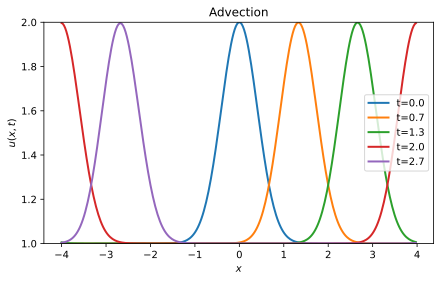

In [17]:
fig, ax = subplots()
for t in linspace(0, 8/3, 5):
    ax.plot(x, sol.sol(t), label=f"t={t:.1f}")
ax.set_xlabel("$x$"); ax.set_ylabel("$u(x,t)$");
ax.set_ylim(1, 2)
ax.set_title("Advection")
ax.legend(loc="right")
show();

An animation shows the solution nicely. The bump moves with speed 2 to the right, reentering on the left as it exits to the right because of the periodic conditions. 

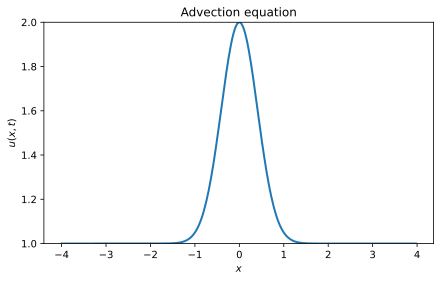

In [19]:
fig, ax = subplots()
curve = ax.plot(x, u_init)[0]
ax.set_xlabel("$x$"); ax.set_ylabel("$u(x,t)$");
ax.set_ylim(1, 2)
ax.set_title("Advection equation");

t = linspace(0,3,201)
def snapshot(j):
    curve.set_ydata(sol.sol(t[j]))
    ax.set_title(f"Advection equation, t = {t[j]:.2f}")
anim = FuncAnimation(fig,snapshot,frames=len(t))
show();